# DS-SF-26 | Codealong 06 | Introduction to Regression and Model Fit

## Setup

In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'zillow-06-start.csv'), index_col = 'ID')

df = read_dataset()

## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

Activity: How to scale SalePrice from $ to $M, Size and LotSize from sqft to "1,000 sqft"?

In [3]:
def scale_variables(df):
    # Sale price in $M
    # Size in 1,000 sqft
    # Lot size in 1,000 sqft

    # **TODO**
    df.SalePrice = df.SalePrice
    df.Size = df.Size
    df.LotSize = df.LotSize

scale_variables(df)

### `SalePrice` as a function of `Size`

In [4]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Thu, 26 May 2016   Prob (F-statistic):           2.67e-58
Time:                        18:53:04   Log-Likelihood:                -15048.
No. Observations:                 967   AIC:                         3.010e+04
Df Residuals:                     965   BIC:                         3.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.551e+05   8.42e+04      1.842      0.066     -1.01e+04   3.2e+05
Size         749.7281     43.473     17.246      0.000       664.415   835.041
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                     3.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model's parameters

In [28]:
model.params

Intercept    8.000000e-07
Size        -1.084202e-19
dtype: float64

In [29]:
type(model.params)

pandas.core.series.Series

In [30]:
model.params['Intercept']

7.9999999999999986e-07

### t-values

In [31]:
model.tvalues

Intercept    1.857739e+15
Size        -3.088982e-01
dtype: float64

### p-values

In [32]:
model.pvalues

Intercept    1.932005e-134
Size          7.644300e-01
dtype: float64

### Confidence Intervals

In [33]:
model.conf_int(cols = [0, 1])

,0,1
Intercept,8.000000e-07,8.000000e-07
Size,-9.024151e-19,6.855747e-19


In [34]:
type(model.conf_int(cols = [0, 1]))

pandas.core.frame.DataFrame

## Part A2 - Simple Linear Regression

### `SalePrice` as a function of `Size` without `Intercept`

In [35]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                      -9.273
Model:                            OLS   Adj. R-squared:                -10.414
Method:                 Least Squares   F-statistic:                    -8.124
Date:                Tue, 24 May 2016   Prob (F-statistic):               1.00
Time:                        19:53:36   Log-Likelihood:                 528.18
No. Observations:                  11   AIC:                            -1052.
Df Residuals:                       9   BIC:                            -1052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept       8e-07   4.31e-22   1.86e+15      0.000         8e-07     8e-07
Size       -1.084e-19   3.51e-19     -0.309      0.764     -9.02e-19  6.86e-19
==============================================================================
Omnibus:                        9.711   Durbin-Watson:                   0.035
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                5.230
Skew:                           1.650   Prob(JB):                       0.0732
Kurtosis:                       3.722   Cond. No.                     3.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Drop outliers

Activity: How to drop outliers?

In [39]:
def drop_outliers(df):
    print('Dropping outliers')
    print('- n (before) =', len(df))

    # TODO
    Q1 = df.SalePrice.quantile(.25)
    Q3 = df.SalePrice.quantile(.25)
    IQR = Q3 - Q1
    print(Q1)
    print(Q3)
    
    df.drop(df[(df.SalePrice > Q3 + 1.5 * IQR) |
               (df.SalePrice < Q1 - 1.5 * IQR)].index, inplace = True)
    print('- n (after)  =', len(df))
    
drop_outliers(df)

Dropping outliers
- n (before) = 1000
800000.0
800000.0
- n (after)  = 11


### `SalePrice` as a function of `Size` (again)

In [8]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     297.4
Date:                Thu, 26 May 2016   Prob (F-statistic):           2.67e-58
Time:                        19:00:37   Log-Likelihood:                -15048.
No. Observations:                 967   AIC:                         3.010e+04
Df Residuals:                     965   BIC:                         3.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.551e+05   8.42e+04      1.842      0.066     -1.01e+04   3.2e+05
Size         749.7281     43.473     17.246      0.000       664.415   835.041
==============================================================================
Omnibus:                     1842.865   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3398350.943
Skew:                          13.502   Prob(JB):                         0.00
Kurtosis:                     292.162   Cond. No.                     3.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part B - How to check modeling assumptions?

### `.plot_regress_exog()`

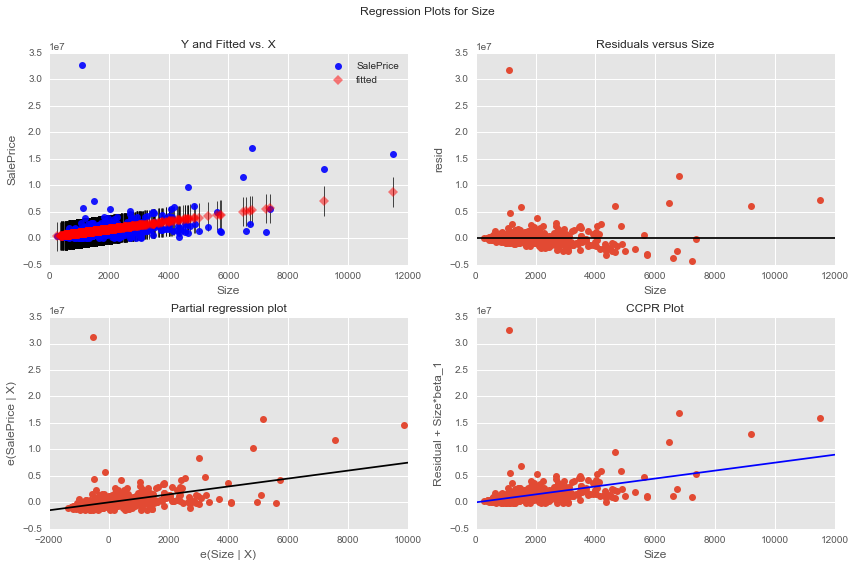

In [6]:
figure = plt.figure(figsize = (12, 8))
figure = sm.graphics.plot_regress_exog(model, 'Size', fig = figure)

## Part C1 - How to check normality assumption?

### Histogram (e.g., residuals)

Activity: How to get histograms of residuals?

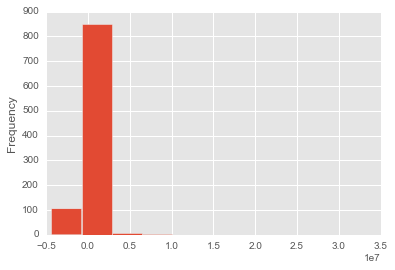

In [13]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.resid.plot(kind = 'hist')

Is it normal?

### q-q plot (e.g., residuals) against a normal distribution

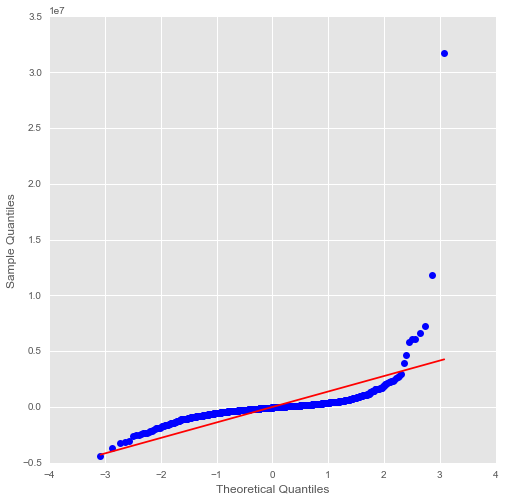

In [14]:
figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(model.resid, line = 's', ax = ax)

plt.show()

## Part C2 - How to check normality assumption?

### q-q plot of two normal distributions

`.qqplot()` with `line = 's'`

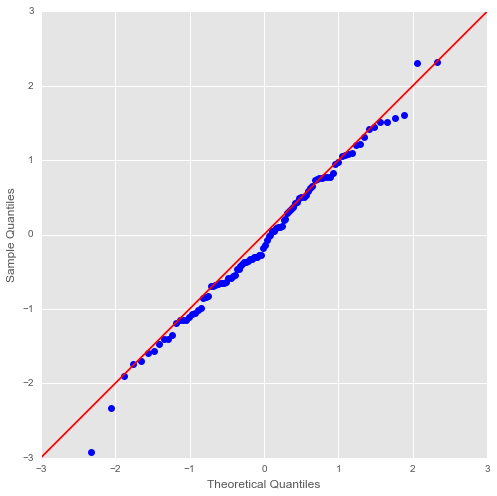

In [15]:
normal_array = np.random.normal(0, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

`.qqplot()` with `line = '45'`; N(0, 1) vs. N(0, 1) 

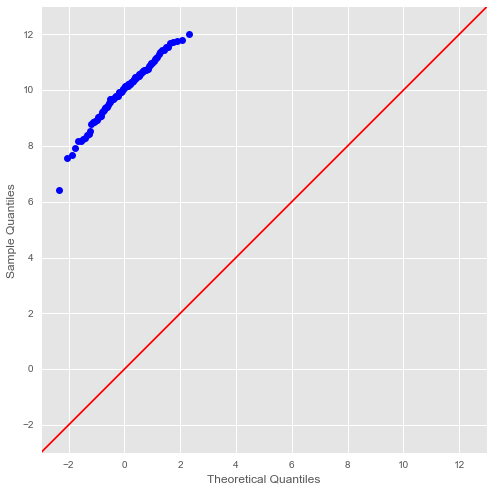

In [16]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

`.qqplot()` with `line = 's'`; N(10, 1) vs. N(0, 1) 

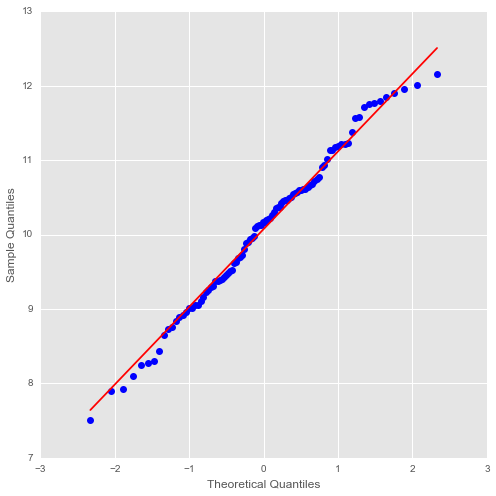

In [17]:
normal_array = np.random.normal(10, 1, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = 's', ax = ax)
plt.show()

`.qqplot()` with `line = '45'`; N(0, 10) vs. N(0, 1) 

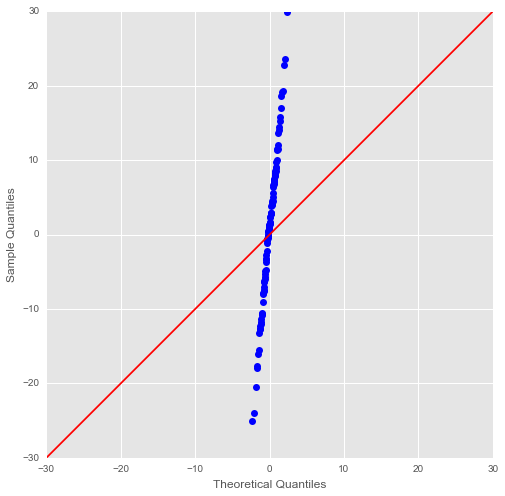

In [20]:
normal_array = np.random.normal(0, 10, size = 100)

figure, ax = plt.subplots(figsize = (8, 8))
figure = sm.qqplot(normal_array, line = '45', ax = ax)
plt.show()

## Part D - Inference and Fit

In [22]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

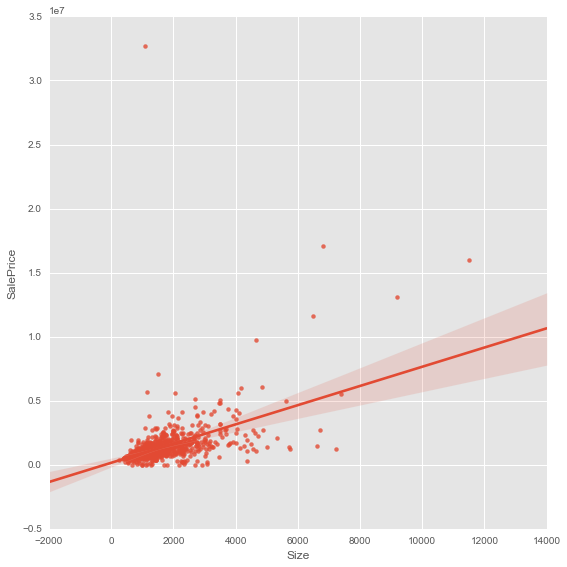

In [26]:
sns.lmplot('Size', 'SalePrice', df, size = 8)

### `SalePrice` as a function of `Size` after dropping the "worst" outlier

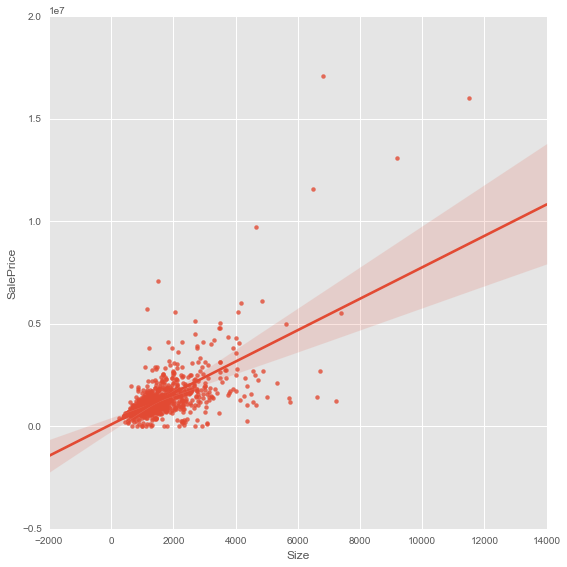

In [27]:
subset_df = df[df.SalePrice < df.SalePrice.max()]

sns.lmplot('Size', 'SalePrice', subset_df, size = 8)

## Part E - R<sup>2</sup>

### `SalePrice` as a function of `Size`

In [25]:
model = smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1255.
Date:                Thu, 26 May 2016   Prob (F-statistic):          7.83e-177
Time:                        19:30:58   Log-Likelihood:                -15049.
No. Observations:                 967   AIC:                         3.010e+04
Df Residuals:                     966   BIC:                         3.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size         817.6357     23.080     35.426      0.000       772.343   862.929
==============================================================================
Omnibus:                     1830.896   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3370566.094
Skew:                          13.300   Prob(JB):                         0.00
Kurtosis:                     291.005   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R<sup>2</sup>

In [28]:
model.rsquared

0.56506068149064226

In [40]:
print('With outliers:')
print('- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared)
print('- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared)

print
drop_outliers(df) # dropping outliers (function defined above)
print

print('Without outliers:')
print('- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared)
print('- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared)

With outliers:
- SalePrice ~     Size; R^2 = -inf
- SalePrice ~ 0 + Size; R^2 = 0.930999318503
Dropping outliers
- n (before) = 11
800000.0
800000.0
- n (after)  = 11
Without outliers:
- SalePrice ~     Size; R^2 = -inf
- SalePrice ~ 0 + Size; R^2 = 0.930999318503


## Part F - Multiple Linear Regression

In [41]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

In [38]:
model = smf.ols(formula = 'SalePrice ~ Size + BedCount', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     506.9
Date:                Thu, 26 May 2016   Prob (F-statistic):          8.01e-144
Time:                        19:59:25   Log-Likelihood:                -12341.
No. Observations:                 819   AIC:                         2.469e+04
Df Residuals:                     816   BIC:                         2.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.968e+05   6.83e+04      2.883      0.004      6.28e+04  3.31e+05
Size        1247.0477     45.295     27.531      0.000      1158.138  1335.957
BedCount   -3.022e+05   3.42e+04     -8.839      0.000     -3.69e+05 -2.35e+05
==============================================================================
Omnibus:                      626.095   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34896.976
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      34.445   Cond. No.                     4.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part G - Multicollinearity

Yet another way to transform variables: `.apply()`

### Transforming Variables (cont.)

In [ ]:
df[ ['SizeLog', 'LotSizeLog'] ] = df[ ['Size', 'LotSize'] ].apply(np.log10)
df[ ['SizeSqrt', 'LotSizeSqrt'] ] = df[ ['Size', 'LotSize'] ].apply(np.sqrt)
df[ ['SizeSquare', 'LotSizeSquare'] ] = df[ ['Size', 'LotSize'] ].apply(np.square)

In [ ]:
df

### Multicollinearity

Multicollinearity between Size, ln(Size), sqrt(Size), and Size^2

In [ ]:
df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeSquare' ] ].corr()

In [ ]:
model = smf.ols(formula = 'SalePrice ~ Size + SizeLog + SizeSqrt + SizeSquare', data = df).fit()

model.summary()

## Part H - Adjusted R<sup>2</sup>

In [ ]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

In [ ]:
x_df = pd.DataFrame(index = df.index)

for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(len(df))

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [ ]:
# TODO